## This python code reverts CE_Fortran_Chapter_02.f90.

# 2. Numerical solution methods

In this chapter we convert simple methods for solving numerical problems in Fortran to Python. This chapter starts with <b><i>linear equation systems</i></b>, continue with <b><i>nonlinear equations</i></b> and finally <b><i>optimization, interpolation</i></b>, and <b><i>integration methods</i></b>. 

## 2.1 Matrices, vectors, and linear equation systems

The general structure of a matrix $A$ and a vector $b$ in mathematcs is given by \begin{equation}
A = \begin{bmatrix}
 a_{11} & a_{12} & \dots & a_{1n} \\ 
 a_{21} & a_{22} & \dots & a_{2n}\\ 
 \vdots & \vdots & \ddots & \vdots \\ 
 a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}
\quad \text{and} \quad
b = \begin{bmatrix}
 b_1 \\
 b_2 \\
 \vdots \\
 b_n
\end{bmatrix}
\end{equation}
Some examples are given in Program 2.1. For more information, check Numpy document.

In [326]:
##### Program 2.1 Matrix and vector operations

# Import package
import numpy as np


# Initialize vectors and matrics

# A vector is a one-dimensional array. You can create a vector from a list of numbers.
# Optionally, you can tell numpy the type of the entries. The 'float' for real number and
# 'int' for intergers.
a = np.array([4,3,2,1],dtype='float')
print('vector a = ', a)


#You can use np.arange(a,b,c) to create a sequence of numbers. The sequence starts from 'a' 
#and continues with 'a+c, a+2c,...' until 'b-1'. If 'b-1' is not in the sequence, the 
#sequence ends with the number that is in this sequence and is closest to 'b-1'.
a = np.arange(4,0,-1) 


# The '+' is used for element-wise sum.
b = a + 4


# You can use np.zeros((a,b)) to create an a*b matrix with all zero entries.
x = np.zeros((2,4))
print('matrix x = ', x)


# Numpy enables us to slicing the matrix easily. x[a,b] means the entry of x located at
# a^th row and b^th column. x[:a,b] means the first entries located ata rows and b^th column.
# x[a,:] means all the entries in a^th row. We can use '=' to replace the entries 
# that we slicing.
x[0,:] = np.arange(1,5)
x[1,:] = np.arange(5,9)
print('matrix x = ', x)


# Using matrix.T to transpose the matrix.
y = x.T
print('transpose of x = ', y)


# Using A@B to multiply two matrices.
z = x@y
print('standard product of x, y = ', z)


# Using A*B to entry-wisely multiply A and B.
w = y.T*x
print('element-wise multiplication of x,y = ', w)


# To produce summary data, we can either collect information for each row or column, 
# or for the whole matrix:

# Maximum entry in each row
print("Row maxima =", np.max(x, axis=0))


# Maximum entry in each column
print("Col maxima =", np.max(x, axis=1))


# Maximum entry in the whole matrix
print("Overall maximum =", np.max(x))



vector a =  [4. 3. 2. 1.]
matrix x =  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
matrix x =  [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
transpose of x =  [[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]
standard product of x, y =  [[ 30.  70.]
 [ 70. 174.]]
element-wise multiplication of x,y =  [[ 1.  4.  9. 16.]
 [25. 36. 49. 64.]]
Row maxima = [5. 6. 7. 8.]
Col maxima = [4. 8.]
Overall maximum = 8.0


### 2.1.2 Solving linear equation system

There are two ways to solve linear systems: by <i>Gaussian elimination</i> or <i>Iterative methods</i>. 

><b>Example</b> Consider the supply and demand functions for three goods given by 

\begin{equation}
\begin{split}
q_1^s &= -10+p_1 ~~~~~~~~ q_1^d = 20-p_1-p_3 \\
q_2^s &= 2p_2 ~~~~~~~~~~~~~~~~~ q_2^d = 40-2p_2-p_3 \\
q_3^s &= -5+p_3 ~~~~~~~~~~ q_3^d = 25-p_1-p_2-p_3
\end{split}
\end{equation}
>by setting $q_i^s = q_i^d$ in each market which after rearranging yields the linear equation system

\begin{equation}
\begin{split}
2p_1+p_3 &=30 \\
4p_2+p_3 &=40 \\
p_1+p_2+p_3 &=30
\end{split}
\end{equation}

Rewitten this into matrix version:

\begin{align*}
\left[
    \begin{array}{ccc}
    2 & 0 & 1\\
    0 & 4 & 1\\
    1 & 1 & 1
    \end{array}
    \right]
    \left[
    \begin{array}{c}
    p_1\\
    p_2\\
    p_3
    \end{array}
    \right]
    =\left[
    \begin{array}{ccc}
    30\\
    40\\
    30
    \end{array}
    \right]
\end{align*}

We can express a linear equation system in matrix notation as $$Qp=b$$ where $p$ defines an $n$-dimensional (unknown) vector and $Q$ and $b$ define a $nxn$ matrix and a $n$-dimentional vector of exogenous parameters of the system. In the above example, we have $n=3$ and \begin{equation}
Q = \begin{bmatrix}
 2 & 0 & 1 \\ 
 0 & 4 & 1 \\ 
 1 & 1 & 2
\end{bmatrix},
\quad p = \begin{bmatrix}
 p_1 \\ 
 p_2 \\ 
 p_3
\end{bmatrix},
\quad \text{and} \quad
b = \begin{bmatrix}
 30 \\
 40 \\
 30
\end{bmatrix}.
\end{equation}

**Gaussian Elimination**

If a solution to the equation system existed, we can use gaussian elimination to solve this system. The first step is to break up $Q$ into the product of an unit lower ($L$) triangular matrix and an upper ($U$) triangular matrix, so that $Q$ can be written as $$Q=LU.$$ We can rearrange this system as $$Qp=(LU)p=L(Up)=Ly=b.$$ 

Consequently, we first would determine the vector $y$ from the lower triangular system $Ly=b$ by forward substitution and then $p$ via $Up=y$ using backward substitution. However, LU factorisation has two problems: LU factorisation do not exist for all invertible matrix, and it can be fail catastrophically in the presence of rounding errors. Therefore, we need to invlove <i>partial pivoting</i> into the LU factorisation. The partial pivoting is just multiply a permutation matrix $P$ before $LU$. That is, $Q=PLU$.

Usually, factorising $Q$ using NumPy and SciPy is convenient. But they have slightly different version of factorisation.

In [327]:
##### Program 2.2 Linear equation-solving

import scipy.linalg as linalg

# Initialize vectors and matrics
Q = np.zeros((3,3))
Q[0,:] = ([2,0,1])
Q[1,:] = ([0,4,1])
Q[2,:] = ([1,1,2])
b = np.array([30,40,30])

# Factorise Q


# scipy.linalg.lu_factor factorise Q as P,L,U and store them efficiently (L and U in one 
# n*n matrix and P as a vector of integers). For more information, see scipy.linalg.lu_factor
# document.
LU, piv1 = linalg.lu_factor(Q)
print('P =', piv1)
print('LU =', LU)


# Alternatively, we can use scipy.linalg.lu to factorise Q=PLU and store P, L, U in
# n*n matries. However, this is not the optimal way to store them for large systems 
# (it takes too much memory).

piv2, L, U = linalg.lu(Q)
print('P =', piv2)
print('L =', L)
print('U =', U)


P = [0 1 2]
LU = [[2.   0.   1.  ]
 [0.   4.   1.  ]
 [0.5  0.25 1.25]]
P = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L = [[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.5  0.25 1.  ]]
U = [[2.   0.   1.  ]
 [0.   4.   1.  ]
 [0.   0.   1.25]]


Now $L$ and $U$ have the intended triangular shape. It is easy to check that that $Q=PLU$ still holds. Hence, the result of the equation systems $PLUp=b$ and $Qp=b$ are identical. The above approach can be applied to any invertible matrix $Q$ in order to decompose it into the $L$ and $U$ factors. We can now solve the system $Ly=P^{-1}b=b^{'}$ for $y$ by using forward substitution. The solution to this system is given by:
\begin{align*}
y_1 &= \frac{30}{1} &= 30, \\
y_2 &= \frac{40-0\times30}{1}&=40, \\
y_3 &= \frac{30-0.5\times30-0.25\times40}{1} &= 5.
\end{align*}

Generally, we have 
\begin{equation*}
y_i=b^{'}_i-\sum^{i-1}_{k-1}l_{i,k}y_k, \quad i=1,2,...,n.
\end{equation*}
The linear system $Uq=y$ can then be solved using backward substitution, yielding the solution of the original linear equation, i.e. \begin{equation}
\begin{split}
p_3 &= 5/1.25 =4, \\
p_2 &= (40-1\times4)/4=9, \\
p_1 &= (30-0\times9-1\times4)/2 = 13.
\end{split}
\end{equation}
Generally, we have:
\begin{equation*}
p_i=\frac{y_i-\sum^n_{k=i+1}u_{i,k}x_k}{u_{i,i}},\quad i=1,2,...,n.
\end{equation*}

In [328]:
##### Program 2.2 Linear equation-solving

# Solve the system

# Using np.linalg.solve it directly
p = np.linalg.solve(Q,b)
print('p1, p2, p3 =',p[0],p[1],p[2])

# Using scipy.linalg.lu_solve to solve for p with the pre-calculated P, LU (store efficiently)
p = linalg.lu_solve((LU,piv1),b)
print('p1, p2, p3 =',p[0],p[1],p[2])

p1, p2, p3 = 13.0 9.0 4.0
p1, p2, p3 = 13.0 9.0 4.0


We can also solve this system by multiplying $b$ with $Q^{-1}$. 

Program 2.3 shows how to solve linear system using inverse matrix.

In [329]:
##### Program 2.3 Inversion of matrix

# Import package
from numpy.linalg import inv

# Set up matrix and vector
Q = np.zeros((3,3))
Q[0,:] = ([2,0,1])
Q[1,:] = ([0,4,1])
Q[2,:] = ([1,1,2])
b = np.array([30,40,30])

# Invert Q
Q_inv = inv(Q)
print('Q^-1 = ', Q_inv)

# Calculate solution
p = Q_inv @ b
print('p = ', p)

Q^-1 =  [[ 0.7  0.1 -0.4]
 [ 0.1  0.3 -0.2]
 [-0.4 -0.2  0.8]]
p =  [13.  9.  4.]


Unfortunately, using inverse matrix usually is not a good idea for solving linear system. The rounding errors can be huge for some linear system.

Consider a Hilbert Matrix that is a $n\times n$ matrix with:
\begin{equation*}
A_{i,j}=\frac{1}{i+j+1},
\end{equation*}
where the indices are the same as NumPy (i.e. $i, j = 0,... , n - 1$).
and $b$ is the first column of $A$.

Next program compares solving $Ax=b$ by inverse matrix and SciPy. We can see that matrix inversion method gives a wrong answer due to rounding error.

In [330]:
# Import package

# Function that generates Hilbert Matrix
def hilbert (n):
    A = np. zeros ((n,n))
    for i in range (n):
        for j in range (n):
            A[i,j ]=1/( i+j+1)
    return A
A = hilbert(15)
b = A[: ,0]

# Solving for x by x=A^-1b
A_inv = np.linalg.inv(A)
x = A_inv @ b
print('False x = ', x)

# Solving for x by SciPy
LU, piv1 = linalg.lu_factor(A)
x = linalg.lu_solve((LU,piv1),b)
print('True x =',x)

False x =  [ 5.78079768e-01  2.55232048e+00 -1.75178833e+01  6.16191406e+01
 -3.47109375e+01 -1.74031250e+02  3.51281250e+02 -2.76750000e+02
  9.41250000e+01  6.50000000e+00 -2.00000000e+01  7.00000000e+00
 -1.50000000e+00  0.00000000e+00 -6.25000000e-02]
True x = [ 1.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.]


**Iteration methods**

The basic idea of iterative methods is simple. Given the linear equation system $Qp=b$, one can choose an invertible matrix $M$ that satisfies two conditions: $M\approx Q$; $Mp=b$ is easy to solve.


If such $M$ exsits and after $k$ iterations we have an approximate solution $p^k\approx p$. Then the residual is:
\begin{equation*}
r^k=b-Qp^k=Q(p-p^k)\approx M(p-p^k)
\end{equation*}

Then we have:
\begin{equation*}
p\approx p^k + M^{-1}r^k=p^k+ M^{-1}(b-Qp^k)
\end{equation*}

Based on this, we have our iterative method given by:
\begin{equation*}
p^{k+1}=p^k+ M^{-1}(b-Qp^k)
\end{equation*}


The Jacobi and the Gauss-Seidel method are popular representatives of the iteration methods. While the Jacobi method sets $M$ equal to the diagonal matrix formed out of the diagonal entries of $Q$, the Gauss-Seidel method sets $M$ equal to the upper triangular matrix of lower triangular entries of $Q$. Both of these matrices are easily invertible by hand and satisfies above two conditions.

For Jacobi method, we can easily show that the iterative method is given by:
\begin{equation*}
p^{k+1}=D^{-1}[b-(L+U)p^k].
\end{equation*}
Written out in components, this is:
\begin{equation*}
p_i^{k+1}=\frac{1}{a_{i,i}}\left(b_i-\sum\limits^n_{j=1,j\neq i}a_{i,j}p_j^k\right), \quad \forall i=1,2,...,n.
\end{equation*}

With similar algebra, we can write out Gauss-Seidel Method with components as:

\begin{equation*}
p_i^{k+1}=\frac{1}{a_{i,i}}\left(b_i-\sum\limits^{i-1}_{j=1}a_{i,j}p_j^{k+1}-\sum\limits^{n}_{j=i+1}a_{i,j}p_j^{k}\right), \quad \forall i=1,2,...,n.
\end{equation*}



Program 2.4 shows how iterative methods can be applied to our problem.

In [3]:
##### Program 2.4 Jacobi iteration-Matrix form

# Import package

# Set up matrix and vector
A = np.zeros((3,3))
A[0,:] = ([2,0,1])
A[1,:] = ([0,4,1])
A[2,:] = ([1,1,2])
b = np.array([30,40,30])
ID = np.zeros((3,3))
Dinv = np.zeros((3,3))
for i in range(3):
    ID[i,i] = 1
    Dinv[i,i] = 1/A[i,i]

# Calculate iteratin matrix and vector
C = ID - np.matmul(Dinv, A)
d = np.matmul(Dinv, b)

# Initialize xold
xold = np.zeros(3)

# Start interation
for iter in range(1,201):
    x = d + np.matmul(C, xold)
    print('Iter: ', iter, np.amax(abs(x-xold)))
    # check for convergence
    if np.amax(abs(x-xold)) < 1e-6: 
        print('x = ', x)
        break
    else:
        xold = x

[[0.5  0.   0.  ]
 [0.   0.25 0.  ]
 [0.   0.   0.5 ]]
Iter:  1 15.0
Iter:  2 12.5
Iter:  3 6.25
Iter:  4 4.6875
Iter:  5 2.34375
Iter:  6 1.7578125
Iter:  7 0.87890625
Iter:  8 0.6591796875
Iter:  9 0.32958984375
Iter:  10 0.2471923828125
Iter:  11 0.12359619140625
Iter:  12 0.0926971435546875
Iter:  13 0.04634857177734375
Iter:  14 0.03476142883300781
Iter:  15 0.017380714416503906
Iter:  16 0.01303553581237793
Iter:  17 0.006517767906188965
Iter:  18 0.004888325929641724
Iter:  19 0.002444162964820862
Iter:  20 0.0018331222236156464
Iter:  21 0.0009165611118078232
Iter:  22 0.0006874208338558674
Iter:  23 0.0003437104169279337
Iter:  24 0.00025778281269595027
Iter:  25 0.00012889140634797513
Iter:  26 9.666855476098135e-05
Iter:  27 4.8334277380490676e-05
Iter:  28 3.625070803536801e-05
Iter:  29 1.8125354017684003e-05
Iter:  30 1.3594015513263003e-05
Iter:  31 6.797007756631501e-06
Iter:  32 5.097755817473626e-06
Iter:  33 2.548877908736813e-06
Iter:  34 1.9116584315526097e-06
Iter

In [332]:
##### Program 2.4 Jacobi iteration

# Import package
import numpy as np

# Set up matrix and vector
Q = np.zeros((3,3))
Q[0,:] = ([2,0,1])
Q[1,:] = ([0,4,1])
Q[2,:] = ([1,1,2])
b = np.array([30,40,30])

# Initialize p_old
p_old = np.array([0.0,0.0,0.0])
p = p_old.copy()

# Start interation
for iter in range(1,201):
    for i in range(len(b)):
        Q1 = np.append(Q[i,:i],Q[i,i+1:])
        p1 = np.append(p_old[:i],p_old[i+1:])
        sumterm = Q1 @ p1
        p[i] = (1/Q[i,i])*(b[i] - sumterm)
    print('Iter: ', iter, np.linalg.norm(p-p_old))
    # check for convergence
    if np.linalg.norm(p-p_old) < 1e-8:
        print('p = ', p)
        break
    else:
        p_old = p.copy()

Iter:  1 23.45207879911715
Iter:  2 15.051993223490369
Iter:  3 8.970437559004578
Iter:  4 5.644497458808888
Iter:  5 3.3639140846267166
Iter:  6 2.1166865470533334
Iter:  7 1.2614677817350186
Iter:  8 0.793757455145
Iter:  9 0.47305041815063203
Iter:  10 0.29765904567937496
Iter:  11 0.177393906806487
Iter:  12 0.11162214212976562
Iter:  13 0.06652271505243262
Iter:  14 0.04185830329866211
Iter:  15 0.024946018144662234
Iter:  16 0.01569686373699829
Iter:  17 0.009354756804248339
Iter:  18 0.0058863239013743586
Iter:  19 0.0035080338015931268
Iter:  20 0.0022073714630153844
Iter:  21 0.0013155126755974226
Iter:  22 0.0008277642986307692
Iter:  23 0.0004933172533490334
Iter:  24 0.00031041161198653845
Iter:  25 0.00018499397000588754
Iter:  26 0.00011640435449495191
Iter:  27 6.937273875220783e-05
Iter:  28 4.365163293560697e-05
Iter:  29 2.6014777032077935e-05
Iter:  30 1.6369362350852613e-05
Iter:  31 9.755541387029226e-06
Iter:  32 6.13851088156973e-06
Iter:  33 3.65832802013596e-06

## 2.2 Nonlinear equations and equation systems

The root of a nonlinear equation system usually has no closed-form solution. Consequently various numerical methods addressing the issue of root-finding have been invented. In this section, we introduce a very simple one-dimensional method called bisection search, As this method converges slowly, we show how to speed it up by using Newton's method. We then discuss some modifications of Newton's algorithm and show the very general class of fixed-point iteration methods. 

> **Example** Suppose the demand function in a goods market is given by 
$$q^d(p)=0.5p^{-0.2}+0.5p^{-0.5},$$ where the first term denotes domestic demand the second term export demand. Supply should be inelastic and given by $q^s=2$ units. At what price $p^*$ does the market clear? Setting supply equal to demand leads to the equation $$0.5p^{-0.2}+0.5p^{-0.5}=2$$ which can be reformulated as $$f(p)=0.5p^{-0.2}+0.5p^{-0.5}-2=0.$$ This exactly was the form $f(p)=0$ described above. The market clearing price consequently is the solution to a nonlinear equation. Not that it is no possible to derive an analytical solition to this problem. Hence, we need a numerical method to solve for $p^*$.

### 2.2.1 Bisection search in one dimension

Program 2.5 shows how to find the equilibium price in the above example by using bisection search.
The program proceeds as follows: We first have to make an initial guess of the interval in which the actual root of $f$ is located. We chose $a_0=0.05$ and $b_0=0.25$ in our case. We then calculate function values at the interval endpoints and check whether our condition for a root of $f$ in $[a_0,b_0]$ is satisfied. If not, we write an error message to the console and abort the program.

In [333]:
def bisect(f, inita, initb, tol):
    # Check whether [a,b] bound a root
    if f(inita)*f(initb) < 0:
        print("The scalars a and b do not bound a root")
        
    fval = tol + 1.0 # we need a initial value of f
    a = inita # initial value of a
    b = initb # initial value of b
    
    while abs(fval) > tol:
        m = (a+b)/2.0
        fval = f(m)
        if f(a)*fval < 0.0:
            b = m
        else:
            a = m
        print("a=%5.15e, b=%5.15e, m=%5.15e, f(m)=%5.15e"%(a,b,m,f(m)))
    return m, f(m)

In [334]:
def f(x):
    
    f = 0.5 * x ** (-0.2) + 0.5 * x ** (-0.5) - 2
    
    return f

In [335]:
a = 0.05
b = 0.25
tol = 1e-6

x = bisect(f, a, b, tol)
print('x = ', x[0], 'f = ', x[1])

The scalars a and b do not bound a root
a=1.500000000000000e-01, b=2.500000000000000e-01, m=1.500000000000000e-01, f(m)=2.171572454676829e-02
a=1.500000000000000e-01, b=2.000000000000000e-01, m=2.000000000000000e-01, f(m)=-1.921011805194976e-01
a=1.500000000000000e-01, b=1.750000000000000e-01, m=1.750000000000000e-01, f(m)=-9.623461834656322e-02
a=1.500000000000000e-01, b=1.625000000000000e-01, m=1.625000000000000e-01, f(m)=-4.053602562256731e-02
a=1.500000000000000e-01, b=1.562500000000000e-01, m=1.562500000000000e-01, f(m)=-1.030927225495271e-02
a=1.531250000000000e-01, b=1.562500000000000e-01, m=1.531250000000000e-01, f(m)=5.467220304518072e-03
a=1.531250000000000e-01, b=1.546875000000000e-01, m=1.546875000000000e-01, f(m)=-2.478563016349744e-03
a=1.539062500000000e-01, b=1.546875000000000e-01, m=1.539062500000000e-01, f(m)=1.479765349631013e-03
a=1.539062500000000e-01, b=1.542968750000000e-01, m=1.542968750000000e-01, f(m)=-5.030170328050865e-04
a=1.541015625000000e-01, b=1.5429687

In [336]:
##### Program 2.5 Bisection search in one dimension

# Import package
import numpy as np

# Set initial guesses and function values
a = 0.05
b = 0.25
fa = 0.5 * a ** (-0.2) + 0.5 * a ** (-0.5) - 2
fb = 0.5 * b ** (-0.2) + 0.5 * b ** (-0.5) - 2

# Check whether there is a root in [a,b]
if fa * fb >= 0:
    print('Error: There is no root in [a, b]')

# Start iteration process
for iter in range(1,201):
    # calculate new bisection point and function value
    x = (a + b) / 2
    fx = 0.5 * x ** (-0.2) + 0.5 * x ** (-0.5) - 2
    print('Iter: ', iter, abs(x-a))
    # check for convergence
    if abs(x-a) < 1e-6:
        print('x = ', x, 'f = ', fx)
        break
    else:
        # calculate new interval
        if fa * fx < 0:
            b = x
            fb = fx
        else:
            a = x
            fa = fx
#print('Error: no convergence')

Iter:  1 0.09999999999999999
Iter:  2 0.05000000000000002
Iter:  3 0.024999999999999994
Iter:  4 0.012499999999999983
Iter:  5 0.0062500000000000056
Iter:  6 0.0031250000000000167
Iter:  7 0.0015624999999999944
Iter:  8 0.0007812500000000111
Iter:  9 0.0003906249999999778
Iter:  10 0.0001953124999999889
Iter:  11 9.765624999999445e-05
Iter:  12 4.88281250000111e-05
Iter:  13 2.4414062499977796e-05
Iter:  14 1.2207031249988898e-05
Iter:  15 6.1035156250222045e-06
Iter:  16 3.0517578125111022e-06
Iter:  17 1.5258789062277955e-06
Iter:  18 7.629394531138978e-07
x =  0.15419692993164064 f =  3.6057475769624148e-06


### 2.2.2 Newton's method in one dimension

One of the best known and most efficient methods to solve a linear equation is the so called <i>Newton method</i>.

Starting at an arbitrary point $x_0$, we can approximate $f$ by a first-order Taylor expansion $$\hat{f}(x)\approx f(x_0)+f'(x)(x-x_0).$$ As the function value $f(x_0)$ and the derivative $f$ at $x_0$ usually are known, we can easily find the solution to the equation $\hat{f}(x) = 0$. This solution is given by $$x_1=x_0-\frac{f(x_0)}{f'(x_0)}.$$ We approximate the function $f$ linearly at the point $x_0$ and find the solution $x_1$ to the approximated equation system. $x_1$ is now closer to the true solution $x^*$ of the equation $f(x)=0$ than $x_0$. By defining the iteration rule $x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}$ and starting with an inital guess $x_0$, we therefore abtain a series of values $x_0, x_1, x_2, ...$ that converges towards $x^*$. We again stop the iteration process, if $x_i$ has sufficiently converged, i.e. $$|x_{i+1}-x_i|=|\frac{f(x_i)}{f'(x_i)}|< \varepsilon.$$

Program 2.6 demostrates this approach.

In [337]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [338]:
f_prime = lambda x: - 0.1 * x ** (-1.2) - 0.25 * x ** (-1.5)

x0 = 0.05
tol = 1e-6

estimate = my_newton(f, f_prime, x0, tol)
print('x = ', estimate, 'f = ', f(estimate))

x =  0.1541976402098051 f =  3.6657294977260335e-09


In [339]:
##### Program 2.6 Newton's method in one dimension

# Import package
import numpy as np

# Set initial guesses
xold = 0.05

# Start iteration process
for iter in range(1,201):
    # calculate function value
    f = 0.5 * xold ** (-0.2) + 0.5 * xold ** (-0.5) - 2
    # calculate derivation
    fprime = -0.1 * xold ** (-1.2) - 0.25 * xold ** (-1.5)
    # calculate new value
    x = xold - f / fprime
    print('Iter:', iter, abs(x-xold))
    # check for convergence
    if abs(x-xold) < 1e-6:
        print('x = ', x, 'f = ', f)
        break
    else:
        # copy old value
        xold = x
    
#print('Error: no convergence')

Iter: 1 0.04408732158282293
Iter: 2 0.04169009083687783
Iter: 3 0.016793114299839235
Iter: 4 0.0016146905730098915
Iter: 5 1.2422917255200394e-05
Iter: 6 7.228309617524076e-10
x =  0.15419764093263605 f =  3.6657294977260335e-09


Newton's method also comes with disadvantages. First $f$ obviously has to be continuously differentiable at least once, for quadratic convergence even twice. In addition, Newton's algorithm not necessarily converges to the root of $f$. 

### 2.2.3 Fixed-point iteration methods

The most general class of methods we want to introduce for solving one-dimensional, nonlinear equations is the class of <i> fixed-point iteration</i> methods. This method is based n a reformulation of the nonlinear equation. Suppose we transform $f(x)=0$ by multiplying with $\sigma$ and adding $x$ on both sides into $$x=x+\sigma f(x)=:g(x).$$ Obviously, the solution $x^*$ to this equation is a fixed point of $g(x)$ and in addition $f(x^*)=0$ holds if $\sigma \neq 0$. Hence, the solution to the fixed-point equation $x=g(x)$ is also the solution to the nonlinear equation $f(x)=0$. The fixed point iteration now is defined by $$x_{i+1}=g(x_i)=x_i+\sigma f(x_i).$$ It can be shown that a fixed-point iteration procedire converges, if $|g'(x^*)|<1$ and the initial guess $x_0$ is close enough to the root $x^*$ of $f$. Convergence speed of a fixed-point iteration stronly depends on the function $g$, i.e. we have $$|x_{i+1}-x_i|=c|x_i-x_{i-1}|^p$$ if the first $p-1$ derivatibes of $g$ at $x^*$ are zero and the $p$th derivative is not equal to zero. As in general $g'(x^*)=1+\sigma f'(x^*) \neq 0,$ the above fixed-point iteration will converge linearly towards the actual root of $f$. It is therefore quite slow, however, easy to implement. Program 2.7 shows the fixed-point iteration method for our example.

In [362]:
##### Program 2.7 Fixed-point iteration in one dimension

def my_fixedpoint(f, x0, sigma, tol= 1e-10, maxiter=200, verbose = False):
    '''
    Output is an estimation of the root of f 
    using the Fixed-point iteration method
    recursive implementation
    '''
    itr = 0
    g = lambda x: x + sigma * f(x)
    while(abs(g(x0)-x0) > tol and itr <= maxiter):
        x0 = g(x0)
        itr = itr + 1
        if verbose:
            print('iteration = {}, x = {:.11f}, g(x) = {:.11f}, |g(x) - x| = {:.11f}'.format(itr, x0, g(x0),abs(g(x0)-x0)))
    if itr <= maxiter:
        print('Root of function x = {:.6f} , f(x) = {:.6f}'.format(x0, f(x0)))
        return x0
    else:
        raise ValueError('Fixed point method does not converge!!! Try another sigma or x0!!!')

f = lambda x: 0.5 * x ** (-0.2) + 0.5 * x ** (-0.5) - 2

x = my_fixedpoint(f, 0.3, 0.3)
# x = my_fixedpoint(f, 0.3, 0.3,verbose = True)


Root of function x = 0.154198 , f(x) = 0.000000


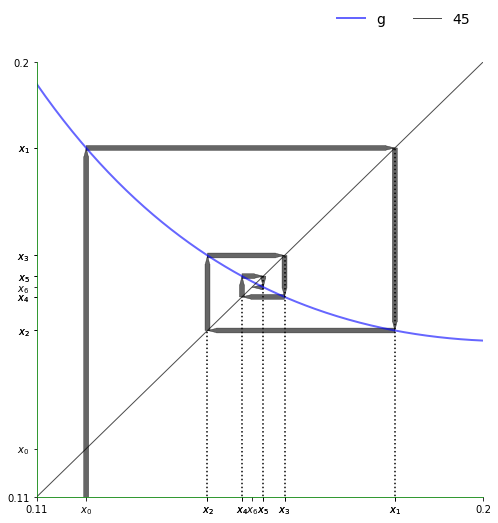

In [1]:
## Code reference: https://python.quantecon.org/scalar_dynam.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size

def subplots(fs):
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots(figsize=fs)

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position(('data',xmin))
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax

def plot45(g, xmin, xmax, x0, num_arrows=6,fs = (6.5,6), var='x'):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots(fs)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k",
                      ec="k",
                      head_width=hw,
                      length_includes_head=True,
                      lw=.5,
                      alpha=0.6,
                      head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='g')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args)
            ax.plot((x, x), (0, x), 'k', ls='dotted')
        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i)))

        x = g(x)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)
    
    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show()


xmin = 0.11
xmax = 0.2
f = lambda x: 0.5 * x ** (-0.2) + 0.5 * x ** (-0.5) - 2
g = lambda x: x + 0.3 * f(x)
plot45(g, xmin, xmax,0.12,fs = (8,8))    

## Uncomment code below to test for other general functions
# xmin = 0.0
# xmax = 2
# A, s, alpha, delta = 2, 0.3, 0.3, 0.4
# g = lambda x: A * s * x**alpha + (1 - delta) * x
# plot45(g, xmin, xmax,0.12,fs = (8,8))

### 2.2.4 Multidimensional nonlinear equation systems

For finding the root of a multidimensional equation system we use the so-called <i>Broyden's method</i>, which is the most popular multivariate generalization of the univariate secant method. This method is also called a <i> quasi-Newton method</i> as it apptoximates the Jaconi matrix of $f$ in order to find the function's root. For demonstrating the use of Broyden's algorithm we consider another example.

> <b>Example</b> Two firms compete in a simple Cournot duopoly with the inverse demand and the cost functions $$P(q) = q^{-\frac{1}{\eta}} \quad C_k(q_k)=\frac{c_k}{2}q_k^2 \quad \text{for firm} \quad k=1,2 \quad \text{with} \quad q=q_1+q_2.$$ Given the profit functions of the two firms $$\Pi_k(q_1, q_2) = P(q_1+q_2)q_k-C_k(q_k)$$ each firm $k$ takes the other firm's output as given and chooses its own output level in order to solve $$\frac{\partial \Pi_k}{\partial q_k} = f(q) = (q_1+q_2)^{-\frac{1}{\eta}}-\frac{1}{\eta}(q_1+q_2)^{-\frac{1}{\eta}}q_k-c_kq_k = 0 \quad \text{with} \quad k=1,2.$$

Program 2.8 shows how to implements Broyden's method.

In [343]:
##### Program 2.8 Multidimensional root-finding

# Import package
import numpy as np
from scipy.optimize import fsolve

# Initialize q and function parameters
q0 = ([0.1,0.1])
eta = 1.6
c = ([0.6, 0.8])

# Function that defines the oligopoly equations
def Cournot(q):
    return sum(q) ** (-1/eta) - (1/eta) * sum(q) ** (-(1/eta) - 1) * q - c * q

# Find root
q = fsolve(Cournot, q0)

# Output
print('Firm 1: ', q[0])
print('Firm 2: ', q[1])
print('Price: ', (sum(q) ** (-1/eta)))

Firm 1:  0.8395676035356583
Firm 2:  0.688796431163002
Price:  0.7671110596740338


<b> Gauss-Seidel Iteration</b> In order to implement an iteration process we reformulate the zero-profit conditions as \begin{equation}
\begin{split}
q_{1,i+1} &= \frac{1}{c_1}\{(q_{1,i}+q_{2,i})^{-\frac{1}{\eta}}-\frac{1}{\eta}(q_{1,i}+q_{2,i})^{-\frac{1}{\eta}-1}q_{1,i} \} \\
q_{2,i+1} &= \frac{1}{c_2}\{(q_{1,i}+q_{2,i})^{-\frac{1}{\eta}}-\frac{1}{\eta}(q_{1,i}+q_{2,i})^{-\frac{1}{\eta}-1}q_{2,i} \}
\end{split}
\end{equation}
where $q_{k,i+1}$ is the $i$th iterate of $q_k$. Starting with an initial guess $q_{k,0}$ the algorigm computes in each iteration $i$ new values for the quantities $q_k$ and then a new guess $q_{k, i+1}$ for the next iteration. Typically, the new guess is a linear comnbination of the old guess and the computed value, i.e. $$q_{k,i+1}=\omega q_{k,i+1} + (1-\omega)q_{k,i} \quad \text{with} \quad o<\omega \leq 1.$$
Program 2.9 shows how the Cournot duopoly problem could be solved by iteration.

In [344]:
import numpy as np

def gauss_seidel(A, b, tolerance=1e-10, max_iterations=10000):
    
    x = np.zeros_like(b, dtype=np.double)
    
    #Iterate
    for k in range(max_iterations):
        
        x_old  = x.copy()
        
        #Loop over rows
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
            
        #Stop condition 
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tolerance:
            break
            
    return x

#ref: Numerical Methods and Programming, retrieved from 
#https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_IterativeSolvers.html

In [345]:
##### Program 2.9 Gauss-Seidel iteration

# Import package
import numpy as np

# Initialize q and function parameters
eta = 1.6
c = ([0.6, 0.8])
qold = np.zeros(2) + 0.1
damp = np.zeros(2) + 0.7

for iter in range(1,201):
    q = (sum(qold) ** (-1/eta) - (1/eta) * sum(qold) ** (-1/eta - 1) * qold) / c
    q = damp * q + (1 - damp) * qold
    # write to screen
    print('Iter:', iter, q)
    # Check for convergence
    if np.ma.all(abs(q-qold)) < 1e-6:
        print('Output:', q)
        break
    else:
        # update q
        qold = q

Iter: 1 [2.22318741 1.67489056]
Iter: 2 [0.98776309 0.7759402 ]
Iter: 3 [0.82822044 0.67777083]
Iter: 4 [0.84125168 0.69021819]
Iter: 5 [0.83933567 0.68860556]
Iter: 6 [0.83959954 0.68882264]
Iter: 7 [0.83956321 0.68879283]
Iter: 8 [0.83956821 0.68879693]
Iter: 9 [0.83956752 0.68879636]
Iter: 10 [0.83956761 0.68879644]
Iter: 11 [0.8395676  0.68879643]
Iter: 12 [0.8395676  0.68879643]
Iter: 13 [0.8395676  0.68879643]
Iter: 14 [0.8395676  0.68879643]
Iter: 15 [0.8395676  0.68879643]
Iter: 16 [0.8395676  0.68879643]
Iter: 17 [0.8395676  0.68879643]
Iter: 18 [0.8395676  0.68879643]
Iter: 19 [0.8395676  0.68879643]
Iter: 20 [0.8395676  0.68879643]
Iter: 21 [0.8395676  0.68879643]
Iter: 22 [0.8395676  0.68879643]
Iter: 23 [0.8395676  0.68879643]
Output: [0.8395676  0.68879643]


## 2.3 Function minimization

> <b>Example</b> A household can consume two goods $x_1$ and $x_2$. It values the consumption of those goods with the joint utility function $$u(x_1, x_2)=x_1^{0.4}+(1+x_2)^{0.5}.$$ Here $x_2$ acts as a luxury good, i.e. the household will only consume that $x_2$, if its available resources $W$ are large enough. $x_1$ on the other hand is a normal good and will always be consumed. Naturally, we have to assume that $x_1, x_2\geq0$. With the prices for the goods being $p_1$ and $p_2$, the household has to solve the optimization problem $$\max_{x_1, x_2 \geq 0} x_1^{0.4}+(1+x_2)^{0.5} \quad \text{s.t.} \quad p_1x_1+p_2x_2 = W.$$ Note that there is no analytical solution to this problem.

### 2.3.1 The Golden-Search method

The <i> Golden-Search method</i> minimizes a one-dimensional function on the initially defined interval $[a,b]$. The idea behind this method is quite similar to the one of bisection search. Golden-search, however, devides in each iteration $i$ the interval $[a_i, b_i]$ into two subintervals by using the points $x_{i,1}$ and $x_{i,2}$ which satisfy the conditions $$x_{i,2}-a_i = b_i-x_{i,1} \quad \text{and}\quad \frac{x_{i,1}-a_i}{b_i-a_i}=\frac{x_{i,2}-x_{i,1}}{b_i-x_{i,1}}.$$ The next iteration's interval is then chosen according to \begin{equation}
\begin{split}
a_{i+1} & = a_i \quad \text{and} \quad b_{i+1} = x_{i,2} \quad \quad \text{if} \quad f(x_{i,1})<f(x_{i,2}), \\
a_{i+1} & = x_{i,1} \quad \text{and} \quad b_{i+1} = b_i \quad \quad \quad \quad \text{otherwise.}
\end{split}
\end{equation}
The idea behind this iteration rule is: If $f(x_{i,1})<f(x_{i,2})$, the lower values of $f$ will be closer to $x_{i,1}$ than to $x_{i,2}$. Consequently, one choose the interval $[a_i, x_{i,2}]$ as the new iteration interval and therefore tules out the greter values of $f$.
Program 2.10 shows how to apply the Golden-Search method to the above problem.

In [346]:
import numpy as np
from scipy.optimize import golden

# Initial interval and function values
p = ([1,2])
W = 1 # Normalize the available resources W = 1
a = 0 # a = 0 restricts x2 to be non-negative
b = W / p[1] # Gurantee that x1 is non-negative

# Set starting point
x0 = (a + b) / 2.0 # Set the initial point to be the midpoint of the initial interval

# The utility function
def utility(x):
    return -(((W - p[1] * x) / p[0]) ** 0.4 + (1 + x) ** 0.5)


minimum = golden(utility, brack = (a,b)) # Specifing an initial interval (a,b) 

# Output
print('x1 = ', (W - p[1] * minimum) / p[0])
print('x2 = ', minimum)
print('u  = ', -utility(minimum))
# Note that the scipy.optimize.golden can only search for the global minima

x1 =  1.6131967131840805
x2 =  -0.30659835659204027
u  =  2.043514440866734


In [347]:
##### Program 2.10 Golden-Search method in one dimension

# Import package
import numpy as np
import math

# Initial interval and function values
p = ([1,2])
W = 1
a = 0
b = (W - p[0] * 0.01) / p[1]

# Start iteration process
for iter in range(1,201):
    # calculate x1 and x2 and function values
    x1 = a + (3 - math.sqrt(5)) / 2 * (b-a)
    x2 = a + (math.sqrt(5) - 1) / 2 * (b-a)
    f1 = - (((W - p[1] * x1)/ p[0]) ** 0.4 + (1 + x1) ** 0.5)
    f2 = - (((W - p[1] * x2)/ p[0]) ** 0.4 + (1 + x2) ** 0.5)
    print('Iter:', iter, abs(b-a))
    # check for convergence
    if abs(b-a) < 1e-6:
        print('x1 = ', (W-p[1]*x1)/p[0])
        print('x2 = ', x1)
        print('u  = ', -f1)
        break
    else:
        # get new values
        if f1 < f2:
            b = x2
        else:
            a = x1


Iter: 1 0.495
Iter: 2 0.30592682443119795
Iter: 3 0.18907317556880207
Iter: 4 0.11685364886239592
Iter: 5 0.07221952670640618
Iter: 6 0.04463412215598977
Iter: 7 0.027585404550416415
Iter: 8 0.017048717605573357
Iter: 9 0.01053668694484306
Iter: 10 0.0065120306607303
Iter: 11 0.004024656284112761
Iter: 12 0.0024873743766175398
Iter: 13 0.0015372819074952215
Iter: 14 0.0009500924691223187
Iter: 15 0.000587189438372903
Iter: 16 0.00036290303074941585
Iter: 17 0.00022428640762348724
Iter: 18 0.00013861662312592867
Iter: 19 8.566978449755861e-05
Iter: 20 5.294683862837006e-05
Iter: 21 3.2722945869188566e-05
Iter: 22 2.0223892759181505e-05
Iter: 23 1.2499053110007062e-05
Iter: 24 7.724839649174444e-06
Iter: 25 4.774213460832621e-06
Iter: 26 2.9506261883418247e-06
Iter: 27 1.8235872724907965e-06
Iter: 28 1.1270389158510284e-06
Iter: 29 6.965483566397682e-07
x1 =  0.9999994678844052
x2 =  2.660577974285079e-07
u  =  1.999999920182618


### 2.3.2 Brent's and Powell's algorithms

The problem with Golden-Search is its slow convergence. Therefore the function $f$ needs to be upon quite frequently. For well-behaved functions a more sophisticated algorithm is based on <i>Brent's method</i>. It relies on parabolic apprpmimations $\hat{h}$ of he actual function $f$. Finding the minimum of a parabola is quite easy. 

In [348]:
##### Program 2.11 Brent and Powell for finding minima

# Import package
import numpy as np
from scipy.optimize import fmin, brent, minimize_scalar

# Initial interval and function values
p = ([1,2])
W = 1
a = 0
b = (W - p[0] * 0.01) / p[1]

# The utility function
def utility(x):
    return -(((W - p[1] * x) / p[0]) ** 0.4 + (1 + x) ** 0.5)

# Code 1, fmin
res = fmin(utility, x0)
# Output
print('x1 = ', (W - p[1] * res[0]) / p[0])
print('x2 = ', res[0])
print('u  = ', -utility(res[0]))

# Code 2, brent
minimum = brent(utility, brack = (a,b))
# Output
print('x1 = ', (W - p[1] * minimum) / p[0])
print('x2 = ', minimum)
print('u  = ', -utility(minimum))

# Code 3, minimize_scalar
result = minimize_scalar(utility, bracket = (a,b), method = 'brent')
# Output
print('x1 = ', (W - p[1] * result.x) / p[0])
print('x2 = ', result.x)
print('u  = ', -result.fun)

Optimization terminated successfully.
         Current function value: -2.043514
         Iterations: 17
         Function evaluations: 34
x1 =  1.6132812500000009
x2 =  -0.30664062500000044
u  =  2.0435144400820557
x1 =  1.6131967723905305
x2 =  -0.30659838619526525
u  =  2.0435144408667343
x1 =  1.6131967723905305
x2 =  -0.30659838619526525
u  =  2.0435144408667343


### 2.4.1 Summed Newton-Cotes Methods

In this section we set $w(x) = 1.$ A weighted integral can then simply be computed by approximating $$\int_a^b f(x)dx.$$ Summed Newton-Cotes formulas partition the interval $[a,b]$ into $n$ subintervals of equal length $h$ by computing the quadrature nodes $$x_i: =a+ih, \quad i=0,1,...,n, \quad h:=\frac{b-a}{n}.$$ Next, the function $f$ on every subinterval $[x_i, x_{i+1}]$ is approximated with a polynomial of degree $k$. Finally, we integrate the approximating polynomial on every subinterval and sum up all the resulting sub-areas. 

Program 2.12 shows how to apply the summed trapezoid rule to the function $cos(x)$. We thereby first declare all the variables needed. Special attention should be devoted to the declaration of $x, w$, and $f$. These arrays will store the quadrature nodes $x_i$, the weights the nodes $x_i=a+ih$ and the weights $w_i$ as in $w_0 = w_n = \frac{h}{2} \quad \text{and} \quad w_i = h \quad \text{for} \quad i=1,2,...,n-1.$ With the respective function values, the approximation to the interval $$\int_0^2 cos(x) dx = sin(2)-sin(0).$$

In [349]:
##### Program 2.12 Summed trapezoid rule with cos(x)

# Import package
import numpy as np
import math

# Initial parameters
n = 10
a = 0 
b = 2
h = (b - a) / n
x = np.zeros((n+1)) + a + h * np.arange(n+1)

# Get weights
w = np.zeros((n+1))
w[0] = h / 2
w[n] = h / 2
w[1:n] = h
f = []

# Calculate function values at nodes
for i in range(len(x)): 
    f.append(math.cos(x[i])) 

# Output numerical and analytical solution
print('Numerical: ', sum(w*f))
print('Analytical: ', math.sin(2)-math.sin(0))

Numerical:  0.9062644128156156
Analytical:  0.9092974268256817


### 2.4.2 Guassian Quadrature

Contrary to the Newton-Cotes methods, <i>Gaussian quadrature</i> explicitly allows for nonconstant weight functions $w(x)$. In addition, such methods don't try to approximate the function $f$, but rathter determine weights and nodes such that particular moments with respect to the weighting function $w$ are matched perfectly.

In [350]:
##### Program 2.13 Gauss-Legendre quadrature with cos(x)

# Import package
import numpy as np
import math
from numpy.polynomial import legendre

# Initial values
n = 10
a = 0
b = 2
f = lambda x: np.cos(x)

# Gauss-Legendre (default interval is [-1, 1])
x, w = legendre.leggauss(n)

# Translate x values from the interval [-1, 1] to [a, b]
t = 0.5*(x + 1)*(b - a) + a
gauss = f((x + 1) * (b - a) / 2 + a)

# Output
print('Numerical: ', sum(w*gauss))
print('Analytical: ', math.sin(2)-math.sin(0))

Numerical:  0.9092974268256817
Analytical:  0.9092974268256817


><b>Example</b> Consider an agricultural commodity market, where planting decisions are based on the price expected at harvest $$A=0.5+0.5E(p),$$ with $A$ denoting acreage supply and $E(p)$ defining expected price. After the acreage is planted, a normally distributed random yield $y~N(1,0.1)$ is realized, giving rise to the quantity $q^s=Ay$ whihc is sold at the market clearing price $p=3-2q^s$. In order to solve this system we substitute $$q^s = [0.5+0.5E(p)]y$$ and therefore $$p=3-2[0.5+0.5E(p)]y.$$ Taking expectations on both sides leads to $$E(p)=3-2[0.5+0.5E(p)]E(y)$$ and therefore $E(p)=1$. Consequently, equilibrium acreage is $A=1$. Finally, the equilibrium price distribution has a variance of $$E(p)=E[max(3-2Ay,1)].$$ The equilibrium acreage supply finally is the supply A that fulfils $A=0.5+0.5E(p)$ with the above price expectation. Again, this problem cannot be solved analytically.

In [351]:
##### Program 2.14 Agricultural problem

# Import package
import numpy as np
import math
from scipy.optimize import fsolve
from scipy.stats import norm

# Initial values
mu = 1
sig2 = 0.1
minp = 1
n = 10
A0 = 1
sigma = np.sqrt(sig2)

# Discritize y
y = norm.rvs(size=n,loc=mu,scale=sigma)
w = norm.pdf(y,loc=mu,scale=sigma)
for i in range(0,n):
    w[i] = w[i]/sum(w)
    
# Define market function
def marketfun(x):
    p = (3-2*x*y)
    max_res = []
    for i in range(n):
        max_res.append(max(p[i], minp))
    Ep = sum(w * max_res)
    market = x - (0.5 + 0.5 * Ep)
    return market

# Get optimum
A = fsolve(marketfun,A0)

# Get expectation and variance of price
p = (3-2*A*y)
max_res = []
for i in range(n):
    max_res.append(max(p[i], minp))
Ep = sum(w * max_res)
Varp = sum((w * max_res - Ep) ** 2)

# Output
print('A      = ', A)
print('E(p)   = ', Ep)
print('Var(p) = ', Varp)

A      =  [1.47466817]
E(p)   =  1.9493363457644117
Var(p) =  30.895623975980065


## 2.5 Random variables, distributions, and simulation

1. <i> Uniform distribution</i>: A random variable that is uniformly distributed on the interval $[a,b]$ has the probability density function $$\phi(z)=\begin{cases}
\frac{q}{b-a} & \text{ if } z \in [a,b], \quad \text{and} \\ 
0 & \text{ otherwise. }
\end{cases}$$
The mean and variance of the uniform distribution are $$E(\tilde{x})=\frac{a+b}{2} \quad \text{and} \quad Var(\tilde{x})=\frac{(b-a)^2}{12}.$$

2. <i> Normal distribution</i>: A normally distributed random variable has the density $$\phi(z)=\frac{1}{\sqrt{2\pi \delta^2}} exp(-\frac{(z-\mu)^2}{2\delta^2}).$$ with moments $$E(\tilde{x})=\mu \quad \text{and} \quad Var(\tilde{x})=\delta^2.$$

3. <i> Log-normal distribution</i>: A random variable is log-normally ditributed, when its log follows a normal distribution. The corresponding probability density function is $$\phi(z)=\begin{cases}
\frac{1}{z\sqrt{2\pi \delta^2}} exp(-\frac{(log(z)-\mu)^2}{2\delta^2}) & \text{ if } z\geq 0, \quad \text{and} \\ 
0 & \text{ otherwise. }
\end{cases}$$ Its moments are $$E(\tilde{x})=exp(\mu+\frac{\delta^2}{2}) \quad \text{and} \quad Var(\tilde{x})=exp(2\mu+\delta^2)[exp(\delta^2)-1].$$

4. <i> Binomial distribution</i>: A binomial ditributed random variable is the sum of $n$ independent Bernoulli-distributed random variables. One can think, for example, of tossing a coin $n$ times and counting the number of heads that occured. The corresponding probability distribution is $$P(\tilde{x}=z)=\binom{n}{z}p^z(1-p)^{n-z} \quad \text{for} z\in{0,1,..., n}.$$ $\binom{n}{z}$ thereby denotes the binomial coefficient. Mean and variance of the binomial distribution are $$E(\tilde{x})=np \quad \text{and} \quad Var(\tilde{x})=np(1-p).$$

Program 2.15 shows how 1. 3. 4. can be ploted.

Text(0.5, 1.0, 'Binomial Distribution')

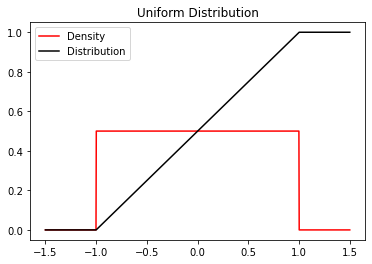

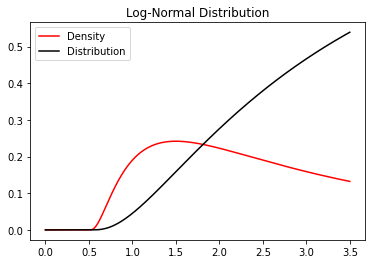

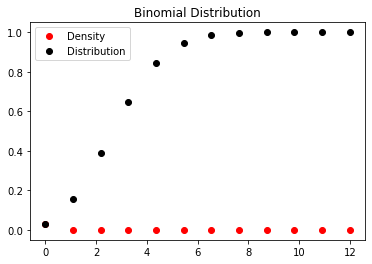

In [352]:
##### Program 2.15 Density and cumulative distribution functions
%matplotlib inline 

# Import package
import numpy as np
import math
from scipy.stats import uniform, lognorm, binom
import matplotlib.pyplot as plt

# Initial set up
NN = 1000

# Uniform distribution
a = -1
b = 1
z = np.linspace(a-0.5, b+0.5, NN)
uniform_distribution = uniform(loc=a, scale=(b-a))
dens = uniform_distribution.pdf(z)
dist = uniform_distribution.cdf(z)

fig, ax = plt.subplots(1, 1)
ax.plot(z, dens, 'r-', label='Density')
ax.plot(z, dist, 'k-', label='Distribution')
plt.legend()
plt.title('Uniform Distribution')

# Log-normal distribution
mu = 1
sigma = 0.25
z = np.linspace(0, mu+5*np.sqrt(sigma), NN)
lognorm_distribution = lognorm(1, loc=np.sqrt(sigma), scale=np.exp(mu))
dens = lognorm_distribution.pdf(z)
dist = lognorm_distribution.cdf(z)

fig, bx = plt.subplots(1, 1)
bx.plot(z, dens, 'r-', label='Density')
bx.plot(z, dist, 'k-', label='Distribution')
plt.legend()
plt.title('Log-Normal Distribution')

# Binomial distribution
p = 0.25
n = 12
z = np.linspace(0,n,n)
binomial_distribution = binom(n, p)
dens = binomial_distribution.pmf(z)
dist = binomial_distribution.cdf(z)

fig, cx = plt.subplots(1, 1)
cx.plot(z, dens, 'ro', label='Density')
cx.plot(z, dist, 'ko', label='Distribution')
plt.legend()
plt.title('Binomial Distribution')

Text(0.5, 1.0, 'Binomial Distribution')

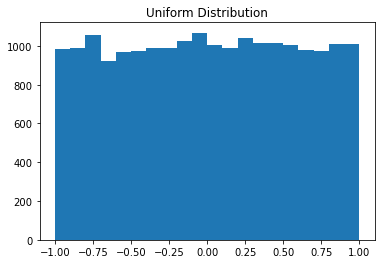

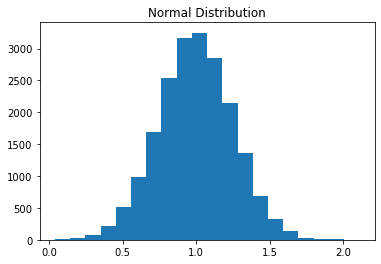

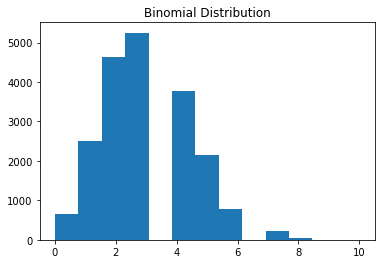

In [353]:
##### Program 2.16 Density and cumulative distribution functions
%matplotlib inline 

# Import package
import numpy as np
import math
from scipy.stats import uniform, lognorm, binom
import matplotlib.pyplot as plt

# Initial set up
NN = 20000

# Uniform distribution
a = -1
b = 1
x = np.random.uniform(a, b, NN)

fig, ax = plt.subplots(1, 1)
plt.hist(x, 20)
plt.title('Uniform Distribution')

# Log-normal distribution
mu = 1
sigma = 0.25
x = np.random.normal(mu, sigma, NN)

fig, bx = plt.subplots(1, 1)
plt.hist(x, 20)
plt.title('Normal Distribution')

# Binomial distribution
p = 0.25
n = 12
x = np.random.binomial(n, p, NN)

fig, cx = plt.subplots(1, 1)
plt.hist(x, n+1)
plt.title('Binomial Distribution')

### 2.6.1 Polynomial interpolation

According to Weierstrass Theorem, any continuous function $f$ defined on a bounded interval $[a,b]$ of the real line can be approximated to any degree of accuracy using a polynomial. This theorem provides a strong motivation for using polynomials to approximate continuous functions. Suppose there are $i=0,...,n$ nodes $x_i$ and interpolation data $y_i=f(x_i)$. Then the polynomial function $$p(x)=\sum_{i=0}^n c_i x^{i}$$ of degree $n$ can exactly replicate the data at each node. From $n+1$ nodes we can derive $n+1$ equations $$\sum_{i=0}^nc_i x_j^i=f(x_j),$$ for $j = 0,...,n.$ In matrix notation we obtain $$\Phi = \begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\ 
1 & x_1 & x_1^2 & \dots & x_1^n \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & x_n & x_n^2 & \dots & x_n^n
\end{bmatrix}, c = \begin{bmatrix}
c_0\\ 
c_1\\ 
\vdots \\ 
c_n
\end{bmatrix}, \quad \text{and} \quad y = \begin{bmatrix}
f(x_1)\\ 
f(x_2)\\ 
\vdots \\ 
f(x_n)
\end{bmatrix},$$
where the linear equation system $\Phi c = y$ could be solved by LU-decomposition. $\Phi$ in this context is called the <i> Vandermonde matrix </i>.

We now have to chose the interpolation nodes $x_i, i=0,\dots,n$. In general, we could use any arbitraty set of points $x_i \in [a,b]$. The simplest approach would be to select $n$ evenly spaced interpolation node, however, polynomial interpolation at evely spaced nodes often comes with problems as the Vandermonde matrix becomes ill conditioned and close to singular. This problem can be solved by choosing so-called <i> Chebyshev nodes</i> so that they are more closely spaced near the endpoints and less in the centre $$x_i = \frac{a+b}{2}+\frac{b-a}{2} \cos\big( \frac{n-i+0.5}{n+1} \pi\big), i=0,\dots,n.$$ Program 2.17 shows how to use built-in packages "scipy.interpolate" to interpolate Runge's function $$f(x) = \frac{1}{1+25x^2}.$$

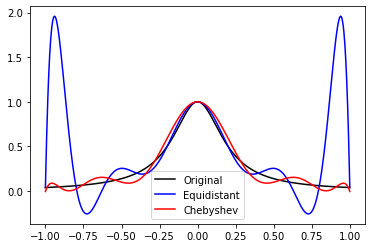

In [354]:
##### Program 2.17 Polynomial interpolation of Runge's function

%matplotlib inline 
# Import package
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate,krogh_interpolate

# Initial set up
N = 10
NN = 1000

# Get equidistant plot nodes and Runge's function
xplot = np.linspace(-1, 1, NN+1)
yreal = 1/(1+25*xplot**2)
fig, ax = plt.subplots(1, 1)
ax.plot(xplot, yreal, 'k-', label = 'Original')

# Equidistant polynomial interpolation
xi = np.linspace(-1, 1, N+1)
yi = 1/(1+25*xi**2)
yplot = krogh_interpolate(xi,yi,xplot)
ax.plot(xplot, yplot, 'b-', label = 'Equidistant')

# Chebyshev polynomial interpolation
def grid_Cons_Chev(a,b,N):
    "This function Creates N Chebychev nodes on the interval [a,b] "
    x = np.zeros(N+1)
    for n in range(N+1):
        x[n] = (a+b)/2 + (b-a)/2*math.cos(np.pi*((2*(N-n)+1)/(2*N+2)))
    return x
xc = grid_Cons_Chev(-1, 1, N)
yc = 1/(1+25*xc**2)
yplot2 = barycentric_interpolate(xc,yc,xplot)
ax.plot(xplot, yplot2, 'r-', label = 'Chebyshev')
plt.legend()


### 2.6.2 Piecewise polynomial interpolation

<i> Piecewise polunomial interpolation</i> defins interpolating polynomials on subintervals $[x_i, x_{i+1}]$. It satisfies the interpolation conditions $\hat{f}(x_i)=f(x_i)$ at the interpolatiion nodes and is continuous over the whole domain $[a,b]$. 

In the following we concentrate on two specific classes of piecewise polynomial interpolants. A first-order or <i>piecewise linear</i> function is a series of line segments that is linked at the interpolation nodes to form a continuous function. A third-order function or <i>cubic spline</i> is a series of cubic polynomial segments spliced together to form a twice continuously differentiable function. 

Piecewise linear functions: Assume an arbitrary set of interpolation data $x_i,f(x_i)$ is given. In the interval $[x_i, x_{i+1}]$ we define the approximating linear function $f_i$ as $$\hat{f}_i(x)=c_{0,i}+c_{1,i}x,$$ where the coefficients can be computed from the two interpolation conditions \begin{equation}
\begin{split}
f(x_i) &= c_{0,i}+c_{1,i}x_i \\
f(x_{i+1}) &= c_{0,i}+c_{1,i}x_{i+1}.
\end{split}
\end{equation}
The interpolating function can be written as $$\hat{f}_i(x)=\frac{(x_{i+1}-x)f(x_i)+(x-x_i)f(x_{i+1})}{x_{i+1}-x_i} \quad \text{if} \quad x\in[x_i,x_{i+1}]$$ which further simplified to $$\hat{f}_i(x)=\varphi f(x_i)+(1-\varphi)f(x_{i+1}) \quad \text{with} \quad \varphi=\frac{x_{i+1}-x}{x_{i+1}-x_i} \quad \text{if} \quad x\in[x_i,x_{i+1}].$$

However due to no being differentiable over the whole domain, piecewise linear functions have some shortcomings which limit their application in many computational economic problems. In such a case, cubic splines offer a better alternative. The $n-1$ piecewise third-order polynomials of a cubic spline on the interval $[x_i,x_{i+1}]$ are $$\hat{f}_i(x)=c_{0,i}+c_{1,i}x+c_{2,i}x^2+c_{3,i}x^3, i=0,\dots,n-1.$$ In order to define a spline function, $n+3$ coefficients are needed.

Program 2.18 shows how to apply both methods to Runge's function. First create the interpolation nodes $x_i$ using **linspace**. Then use **interp** for piecewise linear interpolation and **splrep** for cubic spline interpolation.

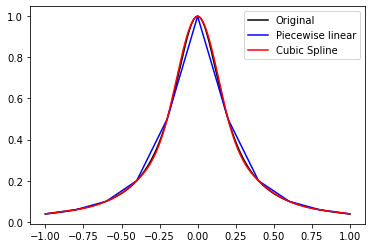

In [355]:
##### Program 2.18 Piecewise linear and cubic spline interpolation

# Import package
import numpy as np
import math
from scipy.interpolate import splrep,splev

# Initial set up
N = 10
NN = 1000

# Get nodes and data for interpolation
xi = np.linspace(-1,1,N+1)
yi = 1/(1+25*xi**2)

# Get nodes and data for plotting
xplot = np.linspace(-1,1,NN+1)
yreal = 1/(1+25*xplot**2)
fig, ax = plt.subplots(1, 1)
ax.plot(xplot, yreal, 'k-', label = 'Original')

# Piecewise linear interpolation
yplot = np.interp(xplot, xi, yi)
ax.plot(xplot, yplot, 'b-', label = 'Piecewise linear')

# Cubic spline interpolation
splines = splrep(xi, yi)
yplot2 = splev(xplot, splines)
ax.plot(xplot, yplot2, 'r-', label = 'Cubic Spline')
plt.legend()

### 2.6.3 A two-dimensional interpolation example

The routines provided above can be extended to handle multidimentional interpolation problems. 
> **Example** $$f(x,z)=x^2+\sqrt{z}.$$ This function should be interpolated for values of $x\in[-1,2]$ and $z \in [0.5,8]$. 

**Bilinear interpolation** There are two ways to perform linear interpolation. We assume the point $(x,z)$ at which we want to interpolate the function $f(x,z)$ to lie within the interval $[x_i,x_{i+1}]$ along the $x$-dimension and the interval $[z_i,z_{i+1}]$ along the $z$-dimension. Its main idea is to successively use linear interpolation along the different dimensions of the function $f$. For both values $z-j$ and $z_{j+1}$, we therefore interpolate the function $f$ along the $x$-dimension to obtain \begin{equation}
\begin{split}
\hat{f}_z(z_j)=\varphi_x f(x_i,z_j)+(1-\varphi_x)f(x_{i+1},z_j) \quad \text{and} \\
\hat{f}_z(z_{j+1})=\varphi_x f(x_i,z_{j+1})+(1-\varphi_x)f(x_{i+1},z_{j+1}).
\end{split}
\end{equation}
To determin the actual function value of the interpolant, we then interpolate the values of $f_z$ along the $z$-dimension and obtain $$\hat{f}_{i,j}(x,z)=\varphi_z \hat{f}_z(z_j)+(1-\varphi_z)\hat{f}_z(z_{i+1}),$$ with $$\varphi_x=\frac{x_{i+1}-x}{x_{i+1}-x_i} \quad \text{and} \quad \varphi_z=\frac{z_{j+1}-z}{z_{j+1}-z_j}.

Following this logic, we can convenientlywrite the piecewise linear interpolating function of $f(x,z)$ as \begin{equation}
\begin{split}
\hat{f}_{i,j}(x,z)=& \varphi_x \varphi_z f(x_i,z_j) + (1-\varphi_x)\varphi_z f(x_{i+1},z_j)\\
& +\varphi_x(1-\varphi_z)f(x_i,z_{j+1})+(1-\varphi_x)(1-\varphi_z)f(x_{i+1},z_{j+1})
\end{split}
\end{equation}
if $x\in[x_i,x_{i+1}]$ and $z\in[z_j,z_{j+1}]$.

**Multidimensional linear interpolation** The true two-dimensional linear interpolant of $f$ as \begin{equation}
\hat{f}_{i,j}(x,z)=\begin{cases}
\varphi_x f(x_i,z_j)+(\varphi_z-\varphi_x)f(x_{i+1},z_j)+(1-\varphi_z)f(x_{i+1},z_{j+1}) \quad \text{if}\varphi_x\leq \varphi_z \quad \text{and} \\
\varphi_z f(x_i,z_j)+(\varphi_x-\varphi_z)f(x_i,z_{j+1})+(1-\varphi_x)f(x_{i+1},z_{j+1}) \quad \text{otherwise},
\end{cases}
\end{equation}
where $\varphi_x$ and $\varphi_z$ are defined in exactly the same way as under the bilinear interpolation scheme.

Program 2.19 shoes how we can implement the two-dimensional bilinear and linear interpolation schemes. The interpolation can simply done with **interp2d** by specifying "linear" and "cubic".

/var/folders/28/1jdy5fdd2dn89zg1s36k_0w00000gn/T/ipykernel_6440/1128918115.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


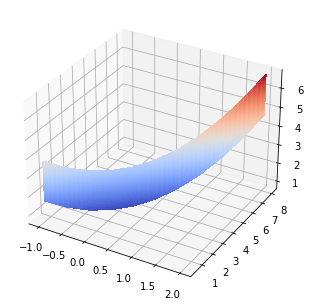

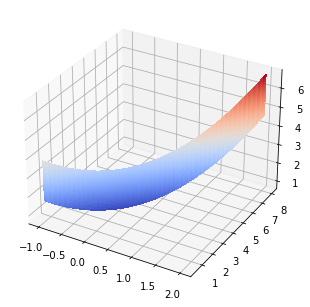

In [356]:
##### Program 2.19 Two-dimensional interpolation

# Import package
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math
from scipy.interpolate import splrep,splev,interp2d

# Define plot data
def plot_data(x, y, z):
    fig = plt.figure()
    #ax = fig.gca(projection='3d')
    ax = Axes3D(fig)
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Initial set up
nx = 10
nz = 20
nerr = 1000
xl = -1
xr = 2
zl = 0.5
zr = 8

# Get nodes and data for interpolation
xi = np.linspace(xl,xr,nx+1)
zi = np.linspace(zl,zr,nz+1)
xx, zz = np.meshgrid(xi, zi)
yi = xx ** 2 + np.sqrt(zz)

# Piecewise linear interpolation
f = interp2d(xi, zi, yi, kind='linear')
xerr = np.linspace(xl,xr,nerr+1)
zerr = np.linspace(zl,zr,nerr+1)
xx_v, zz_v=np.meshgrid(xerr, zerr) 
y_li = f(xerr, zerr)
plot_data(xerr, zerr, y_li)

# Cubic spline interpolation
g = interp2d(xi, zi, yi, kind='cubic')
y_sp = g(xerr, zerr)
plot_data(xerr, zerr, y_sp)

## 2.7 Linear programming

> **Example** Consider a company that produces two goods $x_1$ and $x_2$ on one type of machine. The production is limited to 100 pieces altogether. Good 1 is a time- and cost-intensive production good which requires 4 hours of production time and raw material worth 20 euro per piece. Good 2 is less intensive and can therefore be produced within 1 hour and with raw material worth 10 euro. The remaining time has to be spent on maintenance. In addition, overall costs of raw material should be limited to 1,100 euro per day. The two goods can be sold on the market for 120 euro and 40 euro, respectively. What is the optinal production of goods per day for the company?
This problem can be written as a linear program in standard form $$\min_{x_1,x_2} -120x_1-40x_2, \quad x_1,x_2\geq0$$ subject to \begin{equation}
\begin{split}
x_1+x_2&\leq100\\
4x_1+x_2&\leq160\\
20x_1+10x_2&\leq1100.
\end{split}
\end{equation}

Program 2.20 shows how to solve it using python package **linprog**.

In [357]:
##### Program 2.20 Simplex algorithm for linear programs

# Import package
import numpy as np
import math
from scipy.optimize import linprog

# Set up matrix, target vector and coefficients
A = np.zeros((3,2))
A[0,:] = ([1,1])
A[1,:] = ([4,1])
A[2,:] = ([20,10])
b = np.array([100,160,1100])
c = np.array([-120,-40])

# Solve linear program
res = linprog(c, A_ub=A, b_ub=b)

# Output
print('x      = ', res.x)
print('Cons 1 = ', b[0]-sum(A[0,:]*res.x))
print('Cons 2 = ', b[1]-sum(A[1,:]*res.x))
print('Cons 3 = ', b[2]-sum(A[2,:]*res.x))

x      =  [25. 60.]
Cons 1 =  15.000000000953094
Cons 2 =  1.7715819922159426e-09
Cons 3 =  1.22590790851973e-08
